**Задание 1**

Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg

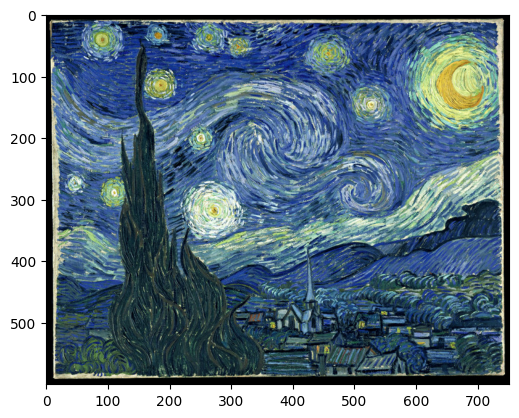

In [33]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img_bgr = cv2.imread('starry_night.jpg')

img_rgb = img_bgr[:, :, ::-1]
cv2.imwrite('starry_night_rgb.jpg', img_rgb)

plt.imshow(img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


**Задание 2**



Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

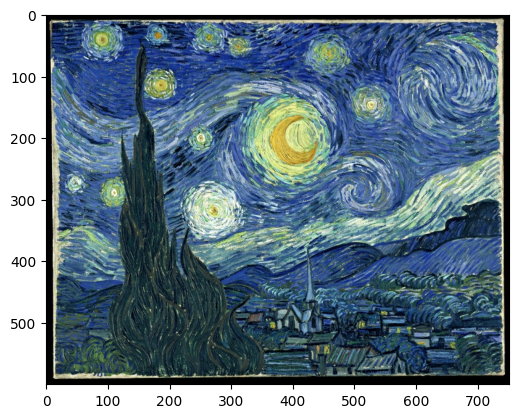

In [28]:
import cv2
import numpy as np

img = cv2.imread('starry_night_rgb.jpg')
swap = cv2.imread('starry_night_rgb.jpg')

center_v, center_m = (210, 380), (120, 650)
radius_squared = 6500

height, width, _ = img.shape

for y in range(height):
    for x in range(width):
        distance_squared = (y - center_v[0]) ** 2 + (x - center_v[1]) ** 2
        if distance_squared <= radius_squared:
            swap[y, x] = img[y - center_v[0] + center_m[0], x - center_v[1] + center_m[1]]
            swap[y - center_v[0] + center_m[0], x - center_v[1] + center_m[1]] = img[y, x]

cv2.imwrite('swap.jpg', swap)
plt.imshow(swap)
cv2.waitKey(0)
cv2.destroyAllWindows()


**Задание 3**

Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

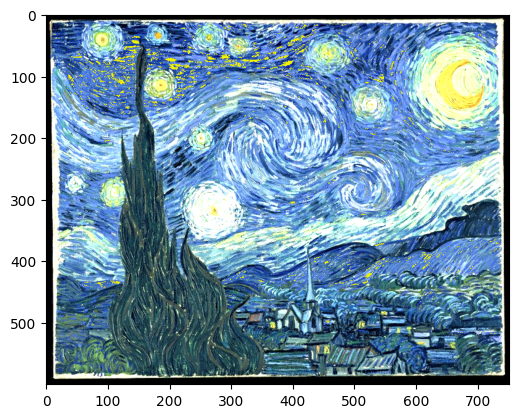

In [22]:
import cv2
import numpy as np

image = cv2.imread('starry_night_rgb.jpg')

brightness_factor = 1.5
brightened_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

dark_blue_lower = np.array([0, 0, 200], dtype="uint16")
dark_blue_upper = np.array([100, 100, 500], dtype="uint16")
yellow_color = np.array([500, 500, 0], dtype="uint16")

mask = cv2.inRange(brightened_image, dark_blue_lower, dark_blue_upper)
brightened_image[np.where(mask > 0)] = yellow_color

cv2.imwrite('starry_day.jpg', brightened_image)

plt.imshow(brightened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
